In [103]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

results1 = Table.read("pipeline_result.csv", format="csv")
results2 = Table.read("pipeline_result_gridded.csv", format="csv")
inputs = Table.read("data/pointlog.txt", format="ascii")
sexresults = Table.read("data/sexresult.txt", format="ascii")

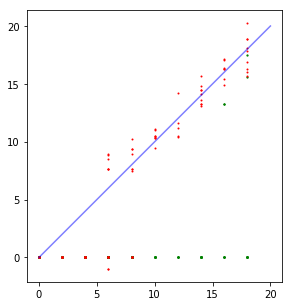

In [75]:

plt.figure(figsize=(5,5))
plt.axes().set_aspect("equal")
plt.scatter(inputs['r']*2,sexresults['Radius'],s=1.5, c='green')
plt.scatter(inputs['r']*2,results1['Distance'],s=1, c='red')
#plt.scatter(inputs['r']*2,results2['Distance'],s=0.2, c='green')

plt.plot([0,20],[0,20],c='blue', alpha=0.5)

plt.savefig("result1.png")

plt.show()

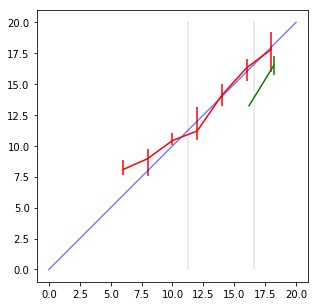

In [163]:


def makebins(inputs, results, rkey):
    binset = {}
    for i in range(len(results)):
        if results[rkey][i]>0:
            if 2*inputs['r'][i] in binset:
                binset[2*inputs['r'][i]].append(results[rkey][i])
            else:
                binset[2*inputs['r'][i]] = [results[rkey][i]]
                
    newbinset = {}
    for key in sorted(binset):
        newbinset[key] = binset[key]

    binset=newbinset

    rval = list(binset.keys())
    
    median = []
    lower = []
    upper = []

    for datum in binset:
        m = np.percentile(binset[datum],50)
        median.append(m)
        lower.append(m-np.percentile(binset[datum],10))
        upper.append(np.percentile(binset[datum],90)-m)
    
    return rval,median,upper,lower


plt.figure(figsize=(5,5))
plt.axes().set_aspect("equal")

rval,median,upper,lower = makebins(inputs, results1, 'Distance')
plt.errorbar(rval, median, yerr=[lower,upper],c='red')

rval,sexmed,sexup,sexlow = makebins(inputs,sexresults, 'Radius')
for i in range(len(rval)):
    rval[i] += 0.2
plt.errorbar(rval, sexmed, yerr=[sexlow,sexup],c='green')

plt.plot([0,20],[0,20],c='blue', alpha=0.5)

bmin = 11.2539052963215
bmaj = 16.62424564361627
plt.plot([bmin,bmin],[0,20],c='black', alpha=0.1)
plt.plot([bmaj,bmaj],[0,20],c='black', alpha=0.1)

plt.savefig("result2.png")
plt.show()